In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

2024-10-06 18:58:05.298836: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 18:58:05.312621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 18:58:05.327205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 18:58:05.331884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 18:58:05.344050: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv("./Churn_Modelling.csv", sep = ",")
#original dataset from: https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann

In [3]:
print(df.info())
print(df.isna().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geogr

The sum for each column is zero, indicating that there are no missing values in the dataframe.

In [4]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Some columns appear irrelevant for the upcoming analysis, so we will drop them.

In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


Some columns contain categorical data in string format, which needs to be converted into numerical form for the machine learning model. Using LabelEncoder to transform these categorical string values into integers.

In [7]:
lab_enc = LabelEncoder()

In [8]:
df["Geography"] = lab_enc.fit_transform(df["Geography"])
df["Gender"] = lab_enc.fit_transform(df["Gender"])

Separating the features (X) and the target variable (y).

In [9]:
X = df.drop(["Exited"], axis = 1)
y = df['Exited']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement
    mode='min',          # Minimize the monitored value
    verbose=1            # Verbosity mode
)


Defining a Sequential neural network model using Keras. This model consists of three layers: two hidden layers and one output layer.

In [12]:
NB_CLASSES = 1
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128, 
                            input_shape = (10,),
                            name = 'Hidden-Layer-1',
                            activation = 'relu'))

model.add(keras.layers.Dense(128,
                             name = 'Hiddel-Layer-2',
                             activation = 'relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'Hidden-Layer-3',
                             activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-06 18:58:07.366686: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hiddel-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,049 (70.50 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 0 (0.00 B)

Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, backward propagation and gradient descent.


Training Progress:
------------------------------------
Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8230 - loss: 0.4346 - val_accuracy: 0.8506 - val_loss: 0.3762
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3700 - val_accuracy: 0.8487 - val_loss: 0.3588
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3511 - val_accuracy: 0.8550 - val_loss: 0.3481
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3314 - val_accuracy: 0.8537 - val_loss: 0.3515
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.3408 - val_accuracy: 0.8525 - val_loss: 0.3473
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3433 - val_accuracy: 0.8525 - val_loss: 0.3499
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3367 - val_accuracy: 0.8519 - val_loss: 0.3496
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

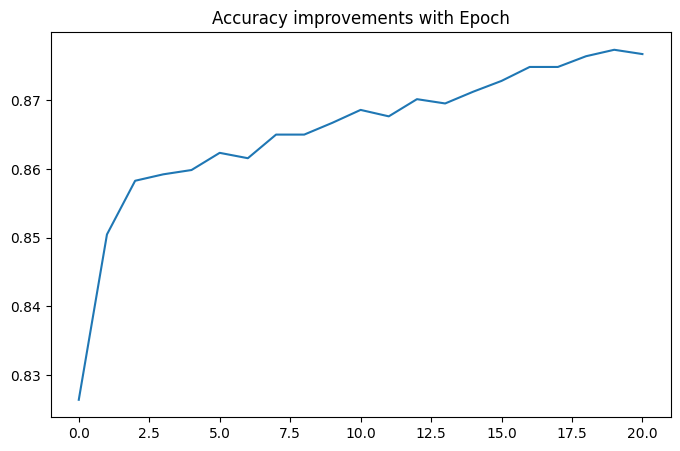


Evaluation against Test Dataset :
------------------------------------
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3538


[0.36042192578315735, 0.8615000247955322]

In [13]:
print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          y_train,
          batch_size=16,
          epochs=25,
          verbose=1,
          validation_split=0.2,
          callbacks=[early_stopping])

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,y_test)

Plotting training and validation accuracy over the epochs.

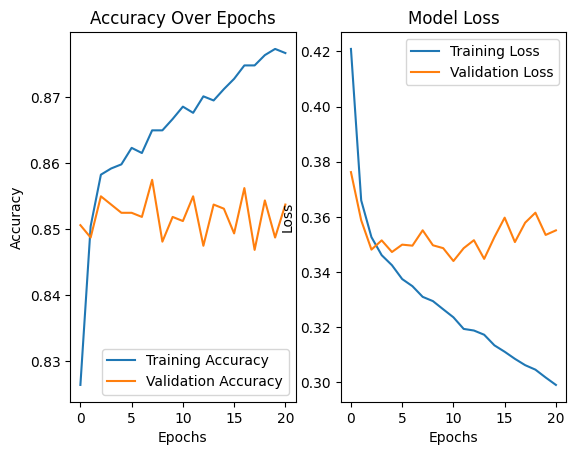

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Although the training accuracy increases over epochs, the validation accuracy slightly decreases. This indicates that the model overfits. We are going to use L2 regularization to improve generalization.

In [15]:
from tensorflow.keras.regularizers import l2
from keras.initializers import HeNormal

model1 = tf.keras.models.Sequential()

model1.add(keras.layers.Dense(128, 
                            input_shape = (10,),
                            name = 'HiddenLayer1',
                            activation = 'relu'
                 ,kernel_regularizer=l2(0.001)))
model1.add(keras.layers.Dense(128,
                             name = 'HiddelLayer2',
                             activation = 'relu'
                             ,kernel_regularizer=l2(0.001)))
model1.add(keras.layers.Dense(1,
                             name = 'HiddenLayer3',
                             activation = 'sigmoid',
                             kernel_regularizer=l2(0.001)))


/home/stavros/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=opt)
history2 = model1.fit(X_train,
                    y_train,
                    batch_size=16,
                    epochs=25,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8182 - loss: 0.4950 - val_accuracy: 0.8425 - val_loss: 0.3952
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8519 - loss: 0.4002 - val_accuracy: 0.8512 - val_loss: 0.3855
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.3868 - val_accuracy: 0.8506 - val_loss: 0.3820
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3753 - val_accuracy: 0.8431 - val_loss: 0.3812
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8472 - loss: 0.3869 - val_accuracy: 0.8413 - val_loss: 0.3833
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3884 - val_accuracy: 0.8512 - val_loss: 0.3785
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.3874 - val_accuracy: 0.8444 - val_loss: 0.4002
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.3729 - val_accuracy: 0.

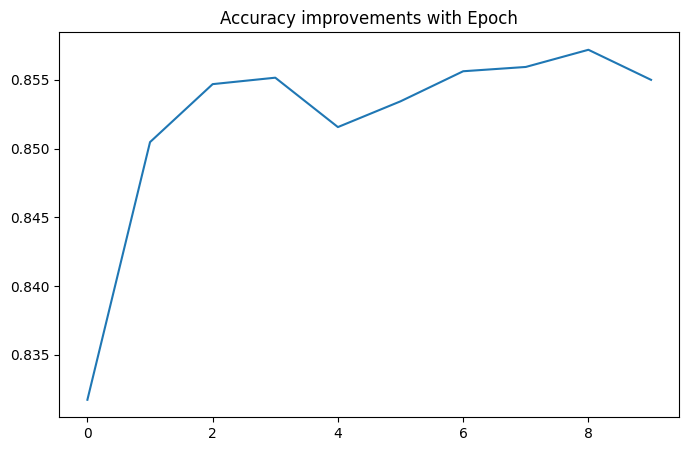


Evaluation against Test Dataset :
------------------------------------
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3700


[0.36630919575691223, 0.862500011920929]

In [17]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history2.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model1.evaluate(X_test,y_test)

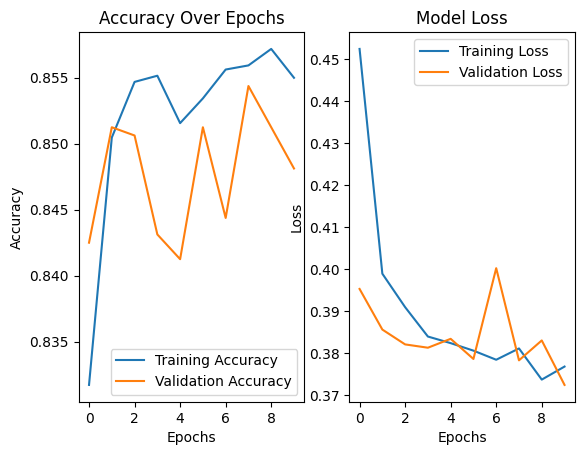

In [18]:
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The new results seem to show better generalization with a smoother curve.